In [29]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [30]:
# Imports
import sys
import joblib
import numpy as np
from math import atan2
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [31]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [32]:
%matplotlib inline

In [33]:
%store -r X_motion_CoM_continuous
%store -r Y_motion_CoM_continuous
print(X_motion_CoM_continuous.shape)
print(Y_motion_CoM_continuous.shape)

(762, 35)
(762, 3)


In [34]:
X_motion_CoM_continuous[0]

array([ 1.00000000e-01,  0.00000000e+00,  0.00000000e+00,  2.76536650e-01,
        7.39996437e-02, -8.95589104e-05,  2.71097532e-01, -1.85977030e-01,
       -8.20218458e-05, -2.41889960e-01,  8.34464317e-02, -3.18781727e-05,
       -2.47859007e-01, -1.72227936e-01, -2.83496783e-05,  3.62276151e-02,
       -5.00990726e-02,  3.77566304e-01, -3.20772482e-04, -3.22219959e-04,
       -1.09502904e-02,  9.99939940e-01,  1.48401986e-04,  1.68948026e-02,
       -1.10034712e-02, -6.04931960e-04,  1.55107237e-02,  9.33398822e-03,
                   nan,             nan,  1.00000000e-01,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00])

In [35]:
Y_motion_CoM_continuous[0]

array([ 0.00994689,  0.00289012, -0.00042429])

# Multivariate Linear Regression (CoM Prediction)

In [36]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [37]:
idx_fr_rl_swinging = np.where(X_motion_CoM_continuous[:, -1] == 0)[0]
X_motion_CoM_continuous_FR_RL = X_motion_CoM_continuous[idx_fr_rl_swinging]
Y_motion_CoM_continuous_FR_RL = Y_motion_CoM_continuous[idx_fr_rl_swinging]
print(X_motion_CoM_continuous_FR_RL.shape)
print(Y_motion_CoM_continuous_FR_RL.shape)

(381, 35)
(381, 3)


## Predict CoM (x) movement

In [38]:
X_motion_CoM_continuous_FR_RL[0, :]

array([ 1.00000000e-01,  0.00000000e+00,  0.00000000e+00,  2.76536650e-01,
        7.39996437e-02, -8.95589104e-05,  2.71097532e-01, -1.85977030e-01,
       -8.20218458e-05, -2.41889960e-01,  8.34464317e-02, -3.18781727e-05,
       -2.47859007e-01, -1.72227936e-01, -2.83496783e-05,  3.62276151e-02,
       -5.00990726e-02,  3.77566304e-01, -3.20772482e-04, -3.22219959e-04,
       -1.09502904e-02,  9.99939940e-01,  1.48401986e-04,  1.68948026e-02,
       -1.10034712e-02, -6.04931960e-04,  1.55107237e-02,  9.33398822e-03,
                   nan,             nan,  1.00000000e-01,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00])

In [39]:
Y_motion_CoM_continuous_FR_RL[0, :]

array([ 0.00994689,  0.00289012, -0.00042429])

### Linear Regression

In [40]:
# Input
X = np.hstack((X_motion_CoM_continuous_FR_RL[:, :3], # motion command
               X_motion_CoM_continuous_FR_RL[:, 3:9],
               X_motion_CoM_continuous_FR_RL[:, 9:11], # FL (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 12:14], # FR (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 15:17], # RL (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 18:20]))
               
# Labels
Y = np.array([Y_motion_CoM_continuous_FR_RL[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fr_com_x = LinearRegression()

# Fit the model
model_fr_com_x.fit(X_train, Y_train)

# Predict
predictions = model_fr_com_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9887109703303119
RMSE:  0.003933847988421025
The lowest error is:  0.00015136640515146793
The highest error is:  0.011381805300566233
The avg. error is:  0.002844452336444875


In [41]:
model_fr_com_x.coef_

array([[ 1.75502392e-01, -2.35150644e-14,  1.29757316e-14,
         7.78771461e-03,  1.32624738e-01, -5.67902198e+00,
         1.95269333e-01, -7.83170795e-01,  6.00219195e-01,
         1.07520234e-01,  3.97976044e-01,  5.20891289e-01,
         1.48392450e-01, -8.32157994e-01,  6.49324414e-02,
         2.04032435e-03, -2.18611264e-01]])

In [42]:
model_fr_com_x.intercept_

array([-0.0314833])

Text(0, 0.5, 'Predictions')

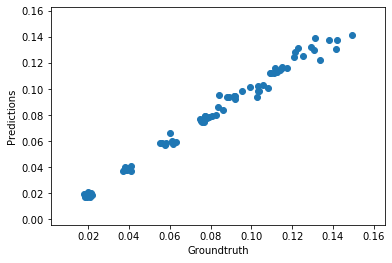

In [43]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [44]:
#%store model_fr_com_x

In [17]:
#for idx, prediction in enumerate(predictions):
#    print(f'Command: {X_test[idx, :3]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [18]:
# Save model
#joblib.dump(model_fr_com_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/model_fr_com_x.sav")

## Predict CoM -> y

### Linear Regression

In [45]:
# Input
X = np.hstack((X_motion_CoM_continuous_FR_RL[:, :3], # motion command
               X_motion_CoM_continuous_FR_RL[:, 3:9],
               X_motion_CoM_continuous_FR_RL[:, 9:11], # FL (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 12:14], # FR (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 15:17], # RL (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 18:20]))

# Labels
Y = np.array([Y_motion_CoM_continuous_FR_RL[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fr_com_y = LinearRegression()

# Fit the model
model_fr_com_y.fit(X_train, Y_train)

# Predict
predictions = model_fr_com_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9277710682207067
RMSE:  0.00043949767304212215
The lowest error is:  9.277635827070058e-06
The highest error is:  0.0013956093878790057
The avg. error is:  0.0003352060620191096


In [46]:
model_fr_com_y.coef_

array([[ 7.22494953e-03, -3.27619715e-14,  3.97933097e-14,
        -3.24406624e-03, -1.00300293e-01,  3.15076726e-02,
        -6.51028842e-03,  1.76932974e-03,  2.52860177e+00,
        -2.76484955e-02, -5.78783487e-02,  7.28414999e-04,
         7.44661728e-02,  3.68076465e-02,  8.88853386e-02,
        -5.18452207e-02,  2.72408742e-02]])

In [47]:
model_fr_com_y.intercept_

array([0.02423595])

Text(0, 0.5, 'Predictions')

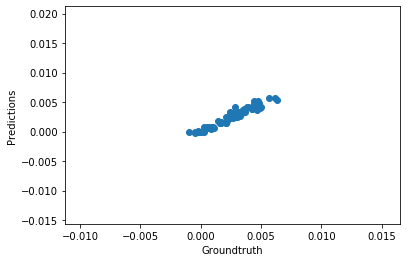

In [22]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [23]:
#%store model_fr_com_y

In [48]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [24]:
# Save model
#joblib.dump(model_fr_com_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/model_fr_com_y.sav")

## Predict CoM -> Yaw

In [48]:
# Input
X = np.hstack((X_motion_CoM_continuous_FR_RL[:, :3], # motion command
               X_motion_CoM_continuous_FR_RL[:, 3:9],
               X_motion_CoM_continuous_FR_RL[:, 9:11], # FL (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 12:14], # FR (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 15:17], # RL (x,y) position
               X_motion_CoM_continuous_FR_RL[:, 18:20]))

# Labels
Y = np.array([Y_motion_CoM_continuous_FR_RL[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fl_com_theta = LinearRegression()

# Fit the model
model_fl_com_theta.fit(X_train, Y_train)

# Predict
predictions = model_fl_com_theta.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.6345593142295298
RMSE:  0.0005035889690853507
The lowest error is:  1.3415564975173544e-05
The highest error is:  0.0015409255034265872
The avg. error is:  0.00041919078741092797


In [49]:
model_fl_com_theta.coef_

array([[ 6.14386359e-03,  9.44966897e-15, -1.14075416e-14,
         6.26288344e-02,  2.43891667e-02,  8.10883768e-02,
         1.43458211e-02, -2.98265665e-02, -7.34657227e-01,
         6.12161351e-03, -3.35216136e-02, -6.22920687e-02,
        -5.77383136e-02, -2.07669593e-02,  9.82403471e-02,
         5.11479335e-03,  3.62274292e-02]])

In [50]:
model_fl_com_theta.intercept_

array([-0.04461337])

Text(0, 0.5, 'Predictions')

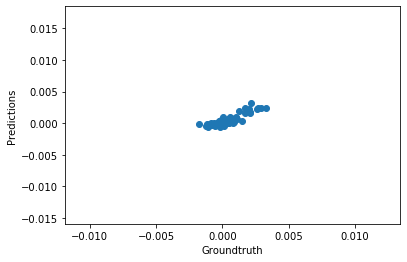

In [28]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")